In [1]:
%config InlineBackend.figure_formats = {'png', 'retina'}
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### 손글씨 분류 모델 만들기

In [ ]:
# 1. 데이터 로드

In [2]:
from sklearn import datasets

In [3]:
mnist = datasets.load_digits() # 8 * 8 이미지, 1797개

In [ ]:
# 2. 데이터 전처리

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
print(len(mnist["data"]))

data = mnist["data"][0]
print(data)

# 원래의 행렬 데이터로 변환
img = data.reshape(8, 8)
img

1797
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

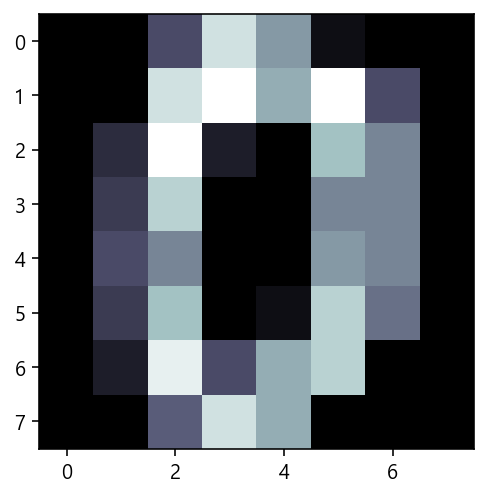

In [6]:
# 이미지 출력
plt.imshow(img, cmap=plt.cm.bone)
plt.show()

In [ ]:
# mnist.data[1000:1002], mnist.target[1000:1002]

In [6]:
from sklearn.model_selection import train_test_split

In [84]:
X=mnist.data
y=mnist.target

train_x, test_x, train_y, test_y = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [ ]:
# 3. 모델 학습 : svm : linear, rbf

In [13]:
from sklearn import svm
from sklearn.svm import SVC

In [107]:
titles = ('1.linear, C=1',
          '2.rbf, gamma=1, C=1',
          '3.rbf, gamma=0.5, C=1',
          '4.rbf, gamma=0.001, C=1',
          '5.rbf, gamma=0.001, C=10',
          '6.poly, gamma=auto, degree=1, C=1',
         )

models = (svm.SVC(kernel='linear', C=1),
          svm.SVC(kernel='rbf', gamma=1, C=1),
          svm.SVC(kernel='rbf', gamma=0.5, C=1),
          svm.SVC(kernel='rbf', gamma=0.001, C=1),
          svm.SVC(kernel='rbf', gamma=0.001, C=10),
          svm.SVC(kernel='poly', gamma='auto', degree=10, C=1),
         )
models = (model.fit(train_x, train_y) for model in models)

In [104]:
for model, title in zip(models, titles):
    print(model)
    print(f"{title}'s score: {np.round(model.score(test_x, test_y),2)}")

SVC(C=1, kernel='linear')
1.linear, C=1's score: 0.97
SVC(C=1, gamma=1)
2.rbf, gamma=1, C=1's score: 0.09
SVC(C=1, gamma=0.5)
3.rbf, gamma=0.5, C=1's score: 0.09
SVC(C=1, gamma=0.001)
4.rbf, gamma=0.001, C=1's score: 0.99
SVC(C=10, gamma=0.001)
5.rbf, gamma=0.001, C=10's score: 0.99
SVC(C=1, degree=10, gamma='auto', kernel='poly')
6.poly, gamma=auto, degree=1, C=1's score: 0.96


In [78]:
# gamma = 0.1 ~ 1.0
# C = 0.1 ~ 10
# kernel = linear, ploy, rbf
# poly-degree = 3 ~ 10

kernel_list = ['linear', 'poly', 'rbf']
degree_list = list(range(4, 11, 1))
gamma_list = list(map(lambda x: 10**x, range(-3,0)))
C_list = list(map(lambda x: 10**x, range(3)))

result_dict = {}
ct=0
for kernel in kernel_list:
    if kernel == 'linear':
        for C in C_list:
            model = SVC(kernel=kernel, C=C)
            model.fit(train_x, train_y)
            score = np.round(model.score(test_x, test_y),4)
            result_dict[ct] = {'kernel':kernel, 'C':C, 'score': score}
            ct+=1
    
    elif kernel == 'poly':
        for degree in degree_list:
            for C in C_list:
                model = SVC(degree=degree, kernel=kernel, C=C)
                model.fit(train_x, train_y)
                score = np.round(model.score(test_x, test_y),4)
                result_dict[ct] = {'kernel': kernel, 'degree': degree, 'C': C, 'score': score}
                ct+=1
                
    else:
        for gamma in gamma_list:
            for C in C_list:
                model = SVC(gamma=gamma, kernel=kernel, C=C)
                model.fit(train_x, train_y)
                score = np.round(model.score(test_x, test_y),4)
                result_dict[ct] = {'kernel':kernel, 'gamma': gamma, 'C': C, 'score': score}
                ct+=1

In [79]:
for key in result_dict.keys():
    print(result_dict[key])

{'kernel': 'linear', 'C': 1, 'score': 0.9741}
{'kernel': 'linear', 'C': 10, 'score': 0.9741}
{'kernel': 'linear', 'C': 100, 'score': 0.9741}
{'kernel': 'poly', 'degree': 4, 'C': 1, 'score': 0.9833}
{'kernel': 'poly', 'degree': 4, 'C': 10, 'score': 0.9815}
{'kernel': 'poly', 'degree': 4, 'C': 100, 'score': 0.9815}
{'kernel': 'poly', 'degree': 5, 'C': 1, 'score': 0.9778}
{'kernel': 'poly', 'degree': 5, 'C': 10, 'score': 0.9796}
{'kernel': 'poly', 'degree': 5, 'C': 100, 'score': 0.9796}
{'kernel': 'poly', 'degree': 6, 'C': 1, 'score': 0.9796}
{'kernel': 'poly', 'degree': 6, 'C': 10, 'score': 0.9778}
{'kernel': 'poly', 'degree': 6, 'C': 100, 'score': 0.9778}
{'kernel': 'poly', 'degree': 7, 'C': 1, 'score': 0.9704}
{'kernel': 'poly', 'degree': 7, 'C': 10, 'score': 0.9685}
{'kernel': 'poly', 'degree': 7, 'C': 100, 'score': 0.9685}
{'kernel': 'poly', 'degree': 8, 'C': 1, 'score': 0.9667}
{'kernel': 'poly', 'degree': 8, 'C': 10, 'score': 0.9648}
{'kernel': 'poly', 'degree': 8, 'C': 100, 'score

In [12]:
# 4. 모델 평가

In [ ]:
# c : 10 : 0.99259 > 과적합확인
# c : 1 : 0.99074
# c : 0.1 : 0.9481

In [ ]:
# 5. 모델 사용

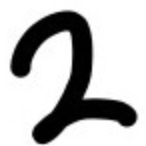

In [49]:
import PIL.Image as pil

sample_data = pil.open("./imgs/data_1.png")
sample_data

In [ ]:
# 이미지 사이즈를 8 * 8로 축소

In [50]:
data1 = sample_data.resize((8, 8))
data1

In [ ]:
# 흑백 이미지로 변경

In [51]:
np.array(data1).shape

(8, 8, 4)

In [52]:
data2 = np.array(data1).mean(axis=2)
data2.shape

(8, 8)

In [ ]:
# 흑백 전환 : 양각 > 음각

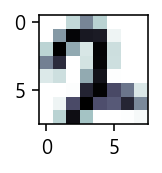

In [53]:
plt.figure(figsize=(2, 1))
plt.imshow(data2, cmap=plt.cm.bone)
plt.show()

In [54]:
data3 = np.ones(data2.shape) * 255 - data2
data3

array([[  0.  ,   0.  ,  30.75,  81.75,  35.25,   0.  ,   0.  ,   0.  ],
       [  0.  ,  70.5 , 171.  , 156.  , 153.75,   8.25,   0.  ,   0.  ],
       [ 33.75, 175.5 ,  61.5 ,  19.5 , 171.75,  25.5 ,   0.  ,   0.  ],
       [ 84.75, 141.  ,   0.  ,  22.5 , 171.  ,  24.75,   0.  ,   0.  ],
       [ 17.25,  24.75,   0.  ,  60.75, 159.75,   0.75,   0.  ,   0.  ],
       [  0.  ,   0.  ,   1.5 , 146.25, 172.5 , 117.75,  90.75,  18.75],
       [  0.  ,   8.25, 117.  , 175.5 , 113.25, 106.5 , 145.5 ,  79.5 ],
       [  0.  ,  34.5 , 164.25,  46.5 ,   0.  ,   0.  ,   0.75,   4.5 ]])

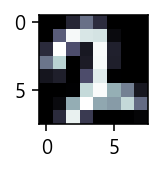

In [55]:
plt.figure(figsize=(2, 1))
plt.imshow(data3, cmap=plt.cm.bone)
plt.show()

In [ ]:
# 색상범위 256 > 16

In [56]:
data4 = np.round(data3 / 16)
data4

array([[ 0.,  0.,  2.,  5.,  2.,  0.,  0.,  0.],
       [ 0.,  4., 11., 10., 10.,  1.,  0.,  0.],
       [ 2., 11.,  4.,  1., 11.,  2.,  0.,  0.],
       [ 5.,  9.,  0.,  1., 11.,  2.,  0.,  0.],
       [ 1.,  2.,  0.,  4., 10.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  9., 11.,  7.,  6.,  1.],
       [ 0.,  1.,  7., 11.,  7.,  7.,  9.,  5.],
       [ 0.,  2., 10.,  3.,  0.,  0.,  0.,  0.]])